In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-original/mnist-original.mat


In [18]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [3]:
mnist = loadmat("/kaggle/input/mnist-original/mnist-original.mat")
mnistx =  mnist["data"].T
mnisty = mnist["label"].T

In [4]:
print(mnistx.shape)
print(mnisty.shape)

(70000, 784)
(70000, 1)


In [5]:
xmoons, ymoons = make_moons(n_samples = 100, noise = 0.1)
print(xmoons.shape)

ymoons = ymoons.reshape(-1, 1)
print(ymoons.shape)

(100, 2)
(100, 1)


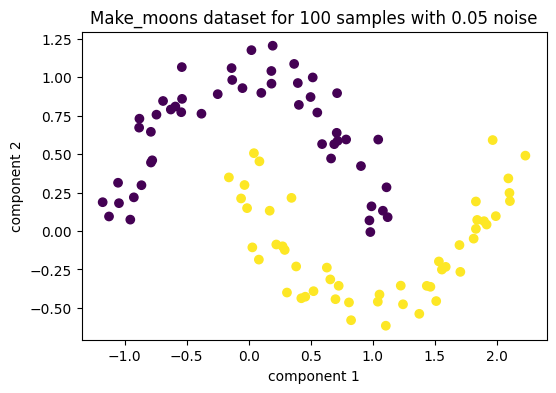

In [6]:
plt.figure(figsize = (6,4))
plt.scatter(xmoons[:, 0], xmoons[:, 1], c = ymoons)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Make_moons dataset for 100 samples with 0.05 noise")
plt.show()

In [7]:
pca = PCA(n_components=2)
xmoonspca = pca.fit_transform(xmoons)
print(xmoonspca.shape)

(100, 2)


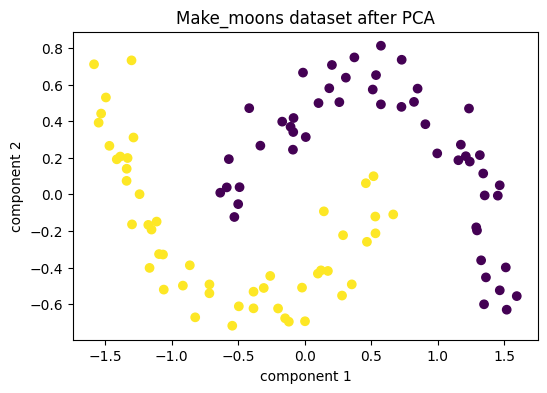

In [8]:
plt.figure(figsize = (6,4))
plt.scatter(xmoonspca[:, 0], xmoonspca[:, 1], c = ymoons)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Make_moons dataset after PCA")
plt.show()

In [9]:
xdigitpca = pca.fit_transform(mnistx)
print(xdigitpca.shape)

(70000, 2)


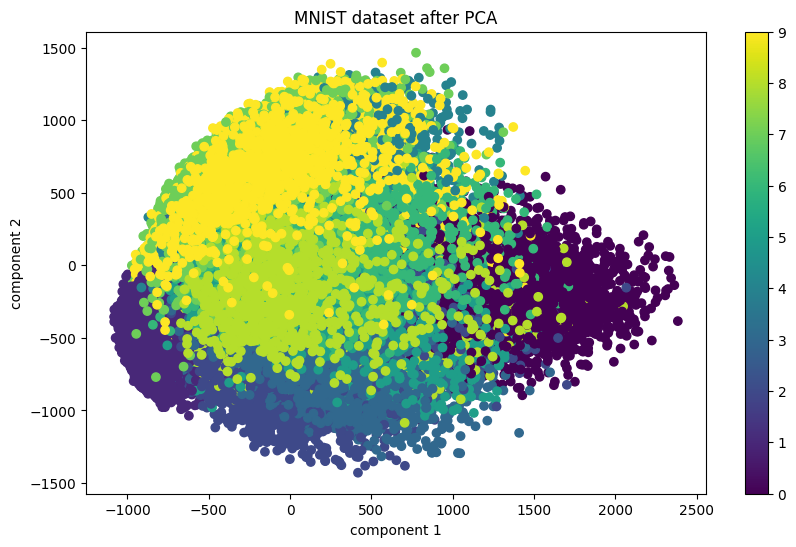

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(xdigitpca[:, 0], xdigitpca[:, 1], c = mnisty)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.title("MNIST dataset after PCA")
plt.show()

Evaluating different other PCA, starting with RandomizedPCA.

In [11]:
randompca = PCA(svd_solver = "randomized", n_components=154)
randompcax = randompca.fit_transform(mnistx)
print(randompcax.shape)

(70000, 154)


In [12]:
increpca = IncrementalPCA(n_components= 154)
for partialx in np.array_split(mnistx, 7):
    increpca.partial_fit(partialx)
xreduced = increpca.transform(mnistx)
print(xreduced.shape)

(70000, 154)


# Kernel PCA for moons dataset

**As can be seen, PCA doesnt yield very good results. The output is quite similar to the input itself making one wonder if we have applied dimensionality reduction or not.**

In [23]:
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(xmoons, ymoons.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [24]:
grid_search.best_estimator_

Pipeline(steps=[('kpca',
                 KernelPCA(gamma=0.04111111111111111, kernel='rbf',
                           n_components=2)),
                ('log_reg', LogisticRegression())])

In [27]:
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2, gamma=0.04, kernel='rbf')),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])
clf.fit(xmoons, ymoons.ravel())

Pipeline(steps=[('kpca', KernelPCA(gamma=0.04, kernel='rbf', n_components=2)),
                ('log_reg', LogisticRegression())])

In [42]:
kpca1 = KernelPCA(kernel = "rbf", gamma = 30, n_components = 2)
reduced_xmoons = kpca1.fit_transform(xmoons)

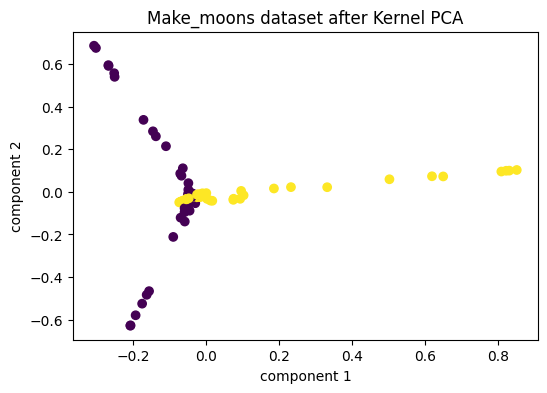

In [43]:
plt.figure(figsize = (6,4))
plt.scatter(reduced_xmoons[:, 0], reduced_xmoons[:, 1], c = ymoons)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Make_moons dataset after Kernel PCA")
plt.show()